In [7]:
import matplotlib.pyplot as plt
import numpy as np
from contextlib import contextmanager

[-1.   -0.25  0.5   1.25  2.  ]


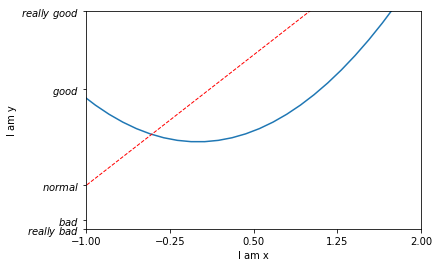

In [31]:
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2
plt.figure()

plt.xlim((-1, 2))
plt.ylim((-2, 3))
plt.xlabel('I am x')
plt.ylabel('I am y')

new_ticks = np.linspace(-1, 2, 5)
print(new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2, -1.8, -1, 1.22, 3],[r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])

plt.plot(x, y2)
plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--')

plt.show()

In [96]:
@contextmanager
def myplot(fig, subplot):
    ax = fig.add_subplot(subplot)
    ax.set_xlim(-1, 12)
    ax.set_ylim(0, 1)
    ax.set_xlabel('sec')
    ax.set_ylabel('signal')
    ax.grid(True)
    #設定x軸刻度
    ax.set_xticks(range(10))
    ax.set_yticks([0, 0.3, 0.5, 0.8, 1],[r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])

    # Plot the data
    yield ax
    
    title = ax.get_title()
    ax.set_title(title)

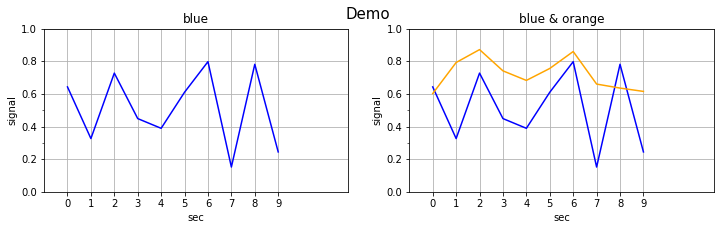

In [97]:
fig = plt.figure(figsize=(12, 3))
fig.suptitle('Demo', fontsize=15)

blue = np.random.rand(10) * 0.7 + 0.1
orange = np.random.rand(10) * 0.3 + 0.6

with myplot(fig, 121) as ax:
    ax.plot(blue, color='blue')
    ax.set_title('blue')
    
with myplot(fig, 122) as ax:
    ax.plot(blue, color='blue')
    ax.plot(orange, color='orange')
    ax.set_title('blue & orange')


In [169]:
@contextmanager
def prf_plot(fig, subplot):
    ax = fig.add_subplot(subplot)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')
    ax.grid(True, linestyle='--')
    #設定x軸刻度
    new_ticks = np.linspace(0, 1, 6)
    ax.set_xticks(new_ticks)
    ax.set_yticks(new_ticks)

    # Plot the data
    yield ax
    
    #calculate precision by given recall & f1
    total_num = 1000
    precision = np.random.rand(total_num)
    precision.sort()
    
    label_name = []
    for f1 in np.linspace(0.1, 0.9, 9):
        recall = f1*precision/(2*precision-f1)
        # choose value greaten than Inflection point
        recall = recall[recall > 0]
        pos_start_index = total_num - int(recall.shape[0])
        ax.plot(precision[pos_start_index:], recall, color = "gray", alpha = 0.5, label = "F="+str('%.1f'%f1))  
   
    title = ax.get_title()
    ax.set_title(title)

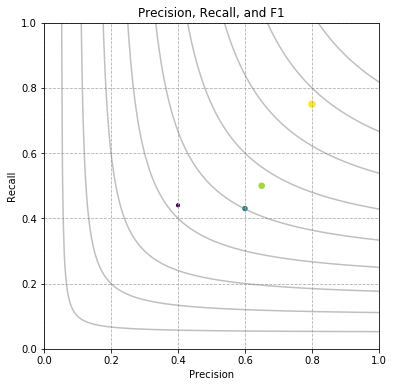

In [170]:
# initialize a square figure
fig = plt.figure(figsize=(6, 6))

# using prf_plot as context manager
with prf_plot(fig, 111) as ax:
    # plot the data
    ax.scatter(x=[0.4, 0.6, 0.65, 0.8], 
               y=[0.44, 0.43, 0.5, 0.75], 
               s=[10, 20, 30, 40], # size
               c=[0.3, 0.6, 0.9, 1.0], # scores for colormap
               cmap='viridis')
     # set the title
    ax.set_title('Precision, Recall, and F1')
